<a href="https://colab.research.google.com/github/Nawsh1337/Movie-Recommendation-Bot-Using-LLMs/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**

# **3 different datasets being used**


In [ ]:
# !pip install -q kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d victorsoeiro/netflix-tv-shows-and-movies
# !kaggle datasets download -d tmdb/tmdb-movie-metadata
# !kaggle datasets download -d stephanerappeneau/350-000-movies-from-themoviedborg

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 2.25M/2.25M [00:00<00:00, 4.35MB/s]
100% 2.25M/2.25M [00:00<00:00, 3.76MB/s]
 79% 7.00M/8.89M [00:00<00:00, 13.5MB/s]
100% 8.89M/8.89M [00:00<00:00, 11.4MB/s]
 94% 63.0M/67.2M [00:02<00:00, 31.0MB/s]
100% 67.2M/67.2M [00:02<00:00, 24.9MB/s]


In [ ]:
# !unzip 350-000-movies-from-themoviedborg.zip
# !unzip netflix-tv-shows-and-movies.zip
# !unzip tmdb-movie-metadata.zip

Archive:  350-000-movies-from-themoviedborg.zip
  inflating: 220k_awards_by_directors.csv  
  inflating: 500 favorite directors_with wikipedia summary.csv  
  inflating: 900_acclaimed_directors_awards.csv  
  inflating: 900_acclaimed_directors_awards/900_acclaimed_directors_awards.csv  
  inflating: AllMoviesCastingRaw.csv  
  inflating: AllMoviesDetailsCleaned.csv  
  inflating: MostCommonLanguageByDirector.csv  
  inflating: language to country.csv  
  inflating: spielberg_awards.csv    
Archive:  netflix-tv-shows-and-movies.zip
  inflating: credits.csv             
  inflating: titles.csv              
Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Putting Datasets on Drive**

In [ ]:
# import shutil
# shutil.copy("tmdb_5000_movies.csv","/content/drive/MyDrive/Movie Recommender Data")
# shutil.copy("AllMoviesDetailsCleaned.csv","/content/drive/MyDrive/Movie Recommender Data")
# shutil.copy("titles.csv","/content/drive/MyDrive/Movie Recommender Data")

'/content/drive/MyDrive/Movie Recommender Data/titles.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df1 = pd.read_csv('/content/drive/MyDrive/Movie Recommender Data/tmdb_5000_movies.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Movie Recommender Data/AllMoviesDetailsCleaned.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Movie Recommender Data/titles.csv')
df1

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.sentiment.value_counts()#balanced

positive    25000
negative    25000
Name: sentiment, dtype: int64

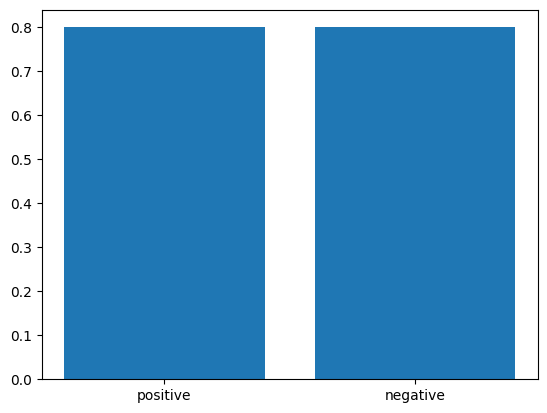

In [ ]:
plt.bar(df.sentiment,0.8)
plt.show()

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.sentiment = df.sentiment.astype(str)#converting them to strings to avoid errors later
df.review = df.review.astype(str)